In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle

In [2]:
data = pd.read_csv('heart.csv')
df = pd.DataFrame(data)

In [3]:
df.head(15)

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRateAchieved,ExerciseInducedAngina,STDepression,Slope,NumberOfMajorVessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


<Axes: >

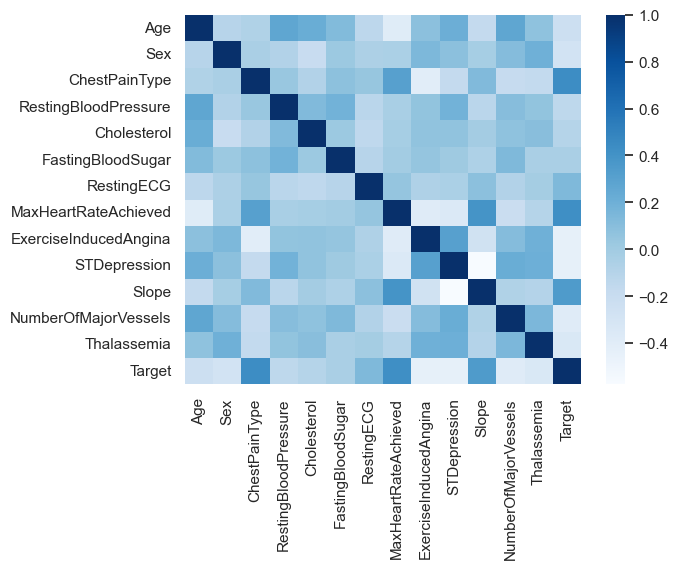

In [4]:
cor_matrix = df.corr()
sns.heatmap(data=cor_matrix, cmap='Blues')

Separating X (Independent) and Y (Dependent)

In [5]:
X = df.drop(['Target'], axis = 1)
Y = df[["Target"]]
print(X.shape)
print(Y.shape)

(1025, 13)
(1025, 1)


In [6]:
from sklearn.model_selection import train_test_split

Splitting the data in train and test sets

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(717, 13) (717, 1)
(308, 13) (308, 1)


Using Standard scaler to scale the values

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

Import important libraries

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
import pickle

Make the best logistic regression model with GridSearchCV

In [10]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize the logistic regression model
lr = LogisticRegression(random_state=24)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

# Get the best model from grid search
best_lr_model = grid_search.best_estimator_

C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Save the best model to a pickle file

In [11]:
# Save the best model to a pickle file
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(best_lr_model, file)

# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

Best parameters: {'C': 0.1, 'solver': 'newton-cg'}
Best cross-validation accuracy: 0.84


Evaluation

In [12]:
pred = best_lr_model.predict(xtest)
pred[0:9]


array([1, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [13]:
pred_prb = best_lr_model.predict_proba(xtest)
pred_prb[0:9,0:9]

array([[0.4500331 , 0.5499669 ],
       [0.12022711, 0.87977289],
       [0.79234598, 0.20765402],
       [0.01494312, 0.98505688],
       [0.98514253, 0.01485747],
       [0.49134312, 0.50865688],
       [0.03709655, 0.96290345],
       [0.10104076, 0.89895924],
       [0.99121723, 0.00878277]])

<Figure size 1000x600 with 0 Axes>

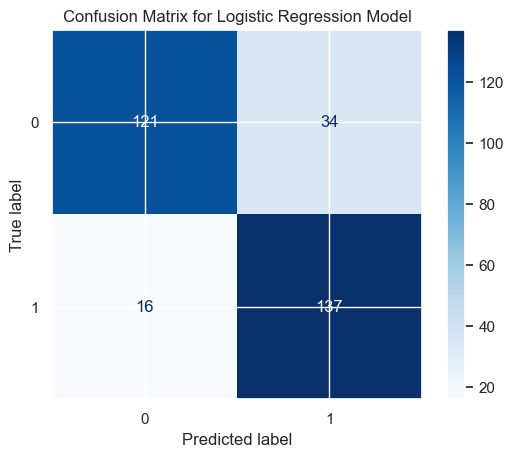

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lr_model.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

Accuracy

In [15]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()


In [16]:
from sklearn.metrics import accuracy_score
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8376623376623377


Precision and Recall

In [17]:
from sklearn.metrics import precision_score
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.8011695906432749
Precision for 0: 0.8832116788321168


In [18]:
precision_lr = precision_score(ytest,pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.8011695906432749


In [19]:
from sklearn.metrics import recall_score
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.8954248366013072
Recall for 0: 0.7806451612903226


In [20]:
recall_lr = recall_score(ytest,pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.8954248366013072


F1 Score

In [21]:
from sklearn.metrics import f1_score
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.845679012345679
F1 Score for 0: 0.8287671232876712


Classification Report

In [22]:
ytrain.value_counts()

Target
1         373
0         344
Name: count, dtype: int64

In [23]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))


              precision    recall  f1-score   support

           0       0.88      0.78      0.83       155
           1       0.80      0.90      0.85       153

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



In [24]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [25]:
tpr, fpr

(0.8954248366013072, 0.21935483870967742)

In [26]:
fpr = 1 - recall_0
tpr, fpr

(0.8954248366013072, 0.21935483870967742)

Defining function to plot ROC AUC Curve

In [27]:
from sklearn.metrics import auc,roc_curve,roc_auc_score
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [28]:
lr_pred_prb = best_lr_model.predict_proba(xtest)[:,1]
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)

In [29]:
auc_lr=roc_auc_score(ytest,lr_pred_prb)
auc_lr

0.9255745308876239

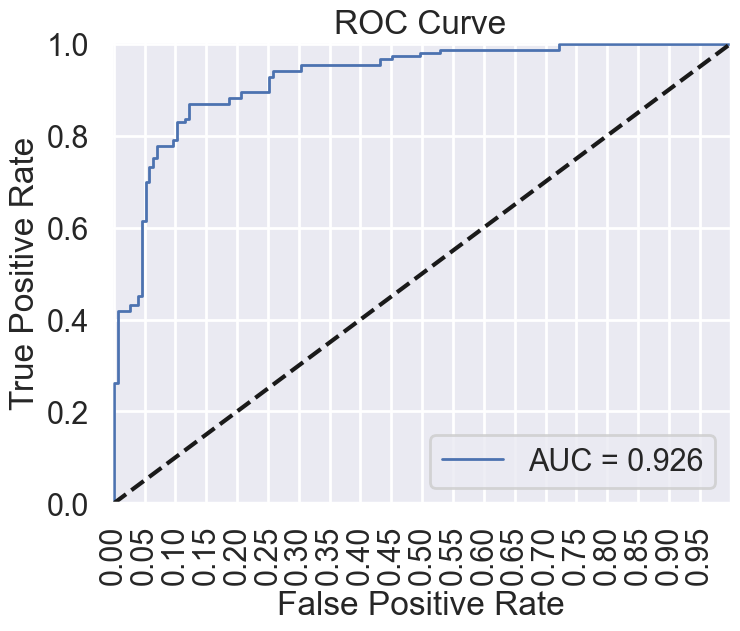

In [30]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

Extracting important features

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initialize the logistic regression model
lrm = LogisticRegression(random_state=24, **grid_search.best_params_)

# Perform RFE with the logistic regression model
rfe = RFE(estimator=lrm, step=3)
rfe.fit(X, Y)


feature_name = np.array(X.columns)

# Get the selected features
selected_features = feature_name[rfe.support_]

# Print the optimal number of features
print("Optimal number of features: %d" % rfe.n_features_)

# Print the selected features
print("Features selected: " + str(list(selected_features)))

# Save the selected features
feature_cols_selected = list(selected_features)

C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features: 6
Features selected: ['Sex', 'ChestPainType', 'ExerciseInducedAngina', 'STDepression', 'NumberOfMajorVessels', 'Thalassemia']


C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
import pandas as pd

# Ensure xtrain and xtest are DataFrames
xtrain = pd.DataFrame(xtrain, columns=X.columns)
xtest = pd.DataFrame(xtest, columns=X.columns)


# Use the selected features
xtrain_new = xtrain[feature_cols_selected]
xtest_new = xtest[feature_cols_selected]

# Train Logistic Regression with the selected features
lm2 = LogisticRegression(random_state=24, **grid_search.best_params_)
lm2.fit(xtrain_new, ytrain)
pred_new=lm2.predict(xtest_new)

C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 1000x600 with 0 Axes>

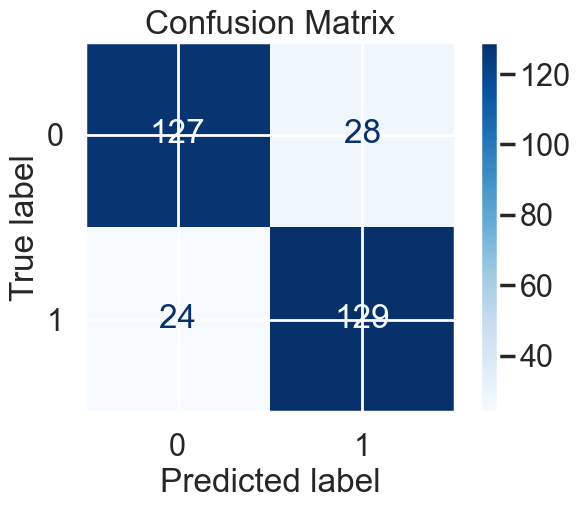

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, pred_new)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lr_model.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [34]:
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(ytest, pred_new)
classification_report_str = classification_report(ytest, pred_new)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report_str)

Accuracy: 0.8312
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       155
           1       0.82      0.84      0.83       153

    accuracy                           0.83       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.83      0.83      0.83       308



## K-Nearest Neighbor (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [36]:
# Predict on the test set
knn_pred = knn.predict(xtest)

In [37]:
# Evaluate the model
accuracy = accuracy_score(ytest, knn_pred)
classification_report_str = classification_report(ytest, knn_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report_str)

Accuracy: 0.8636
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       155
           1       0.87      0.86      0.86       153

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



In [38]:
# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Confusion Matrix

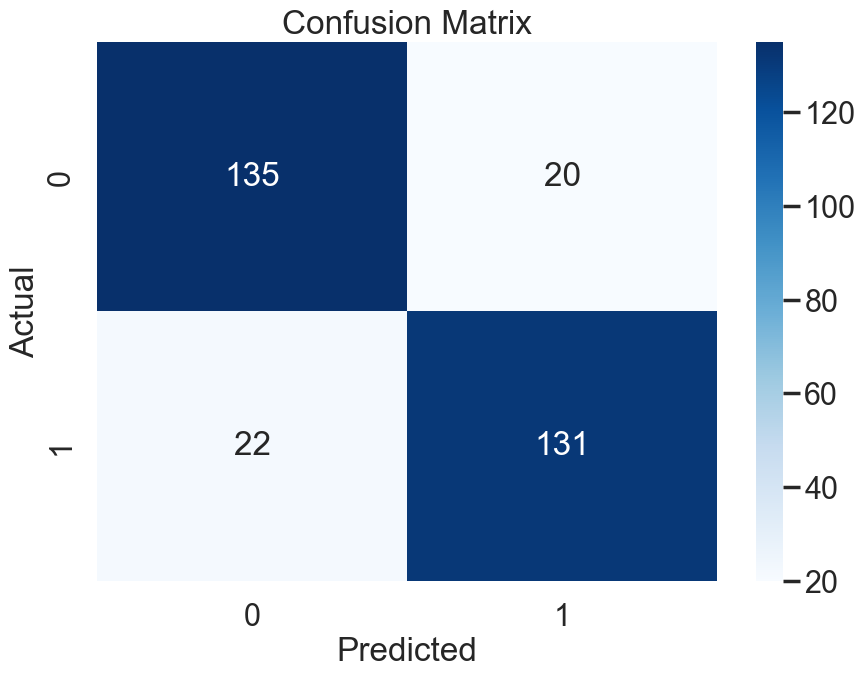

In [39]:
cm = confusion_matrix(ytest, knn_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


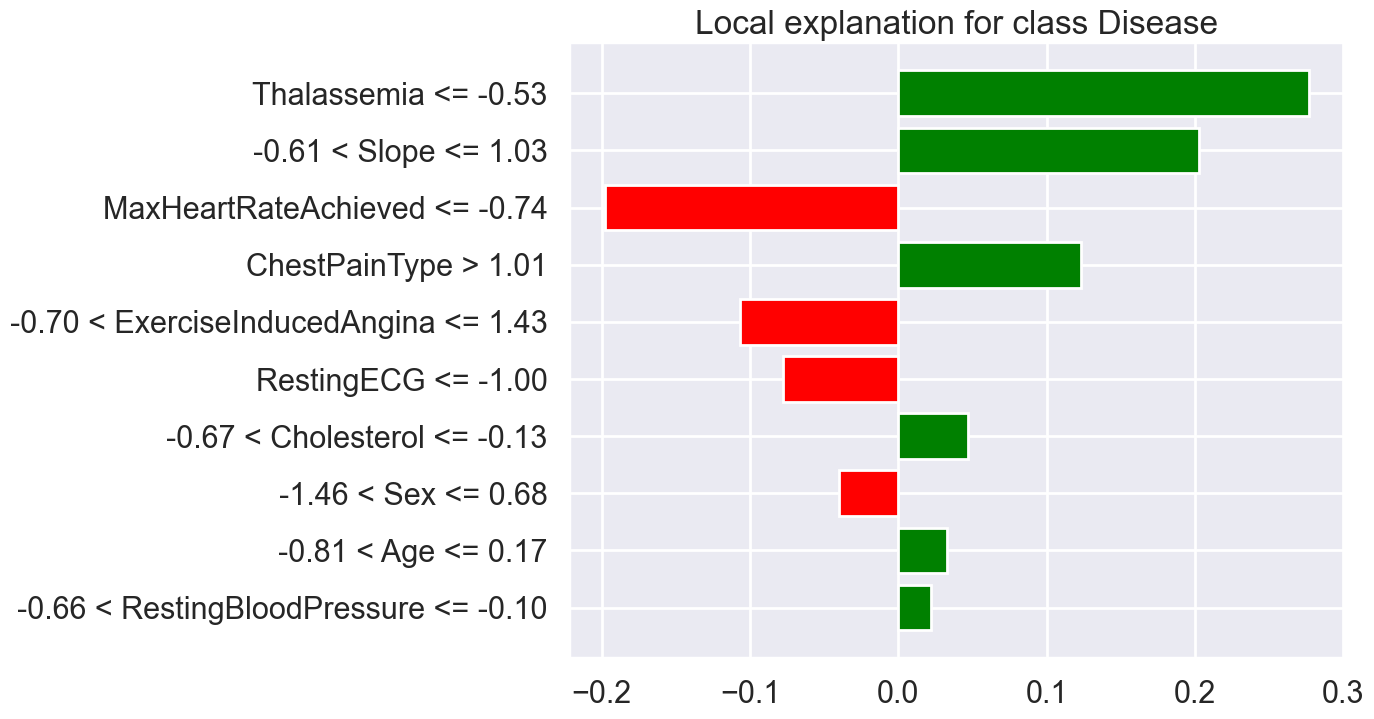

In [40]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Ensure xtrain is in the correct format (DataFrame to array if needed)
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=xtrain.values,  # Convert xtrain to a NumPy array
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    mode='classification'
)

# Choose an instance to explain
i = 0  # You can choose any instance from the test set
# Convert the row to a NumPy array before explaining
exp = explainer.explain_instance(xtest.iloc[i].values, knn.predict_proba)

# Visualize the explanation with a larger figure size
fig = exp.as_pyplot_figure()
fig.set_size_inches(10, 8)
plt.show()


KNN for extracted important features

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Train the new model
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(xtrain_new, ytrain)

C:\Users\sunrise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [42]:
# Predict on the test set
knn_pred_new = knn2.predict(xtest_new)

Confusion Matrix

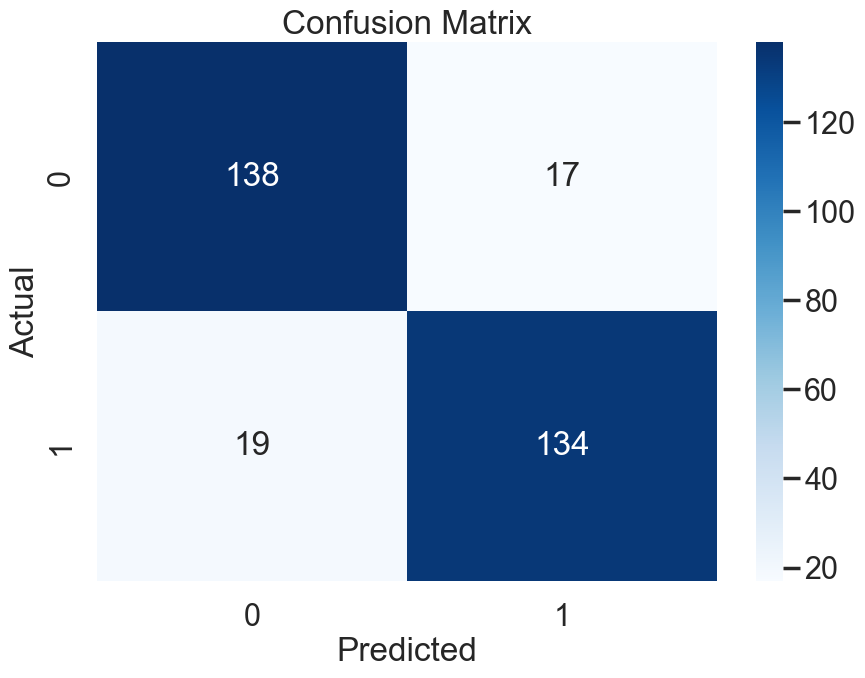

In [43]:
cm = confusion_matrix(ytest, knn_pred_new)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification report

In [44]:
# Evaluate the model
accuracy = accuracy_score(ytest, knn_pred_new)
classification_report_str = classification_report(ytest, knn_pred_new)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report_str)

Accuracy: 0.8831
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       155
           1       0.89      0.88      0.88       153

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308

